# K-近邻改进约会网站配对

源代码及数据集下载:https://www.manning.com/books/machine-learning-in-action

导入模块

In [1]:
# -*- coding: utf-8 -*-
import numpy as np  # 科学计算包
import matplotlib.pyplot as plt  # 可视化绘图
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 输出矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import KNN#自定义的KNN算法

## 收集数据

提供文本文件

## 准备数据

### 使用python解析文本文件

处理输入格式问题。函数输入为文件名字符串，输出为训练样本矩阵和类标签向量

In [2]:
def file2matrix(filename):
    # 得到文件行数
    fr = open(filename)  # fr是一个流对象
    # arrayOLines 即为打开的文件，list表示,每一行是一个字符串如'40920\t8.326976\t0.953952\tlargeDoses\n'
    arrayOLines = fr.readlines()#以行的方式读取流对象
    numberOfLines = len(arrayOLines)  # 获取文件行数，arrayOLines is list
    # 创建返回的NumPy矩阵
    returnMat = np.zeros(shape=(numberOfLines, 3))
    classLabelVector = []
    # 解析文件数据到列表
    index = 0
    for line in arrayOLines:
        line = line.strip()  # 截取掉首尾所有回车字符,返回str
        listFromLine = line.split('\t')  # 以'\t'分割成list
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

## 分析数据

### 使用Matplotlib创建散点图

<Figure size 432x288 with 0 Axes>

Text(0.5,0,'每年获取的飞行常客里程数')

Text(0,0.5,'玩视频游戏所耗时间百分比')

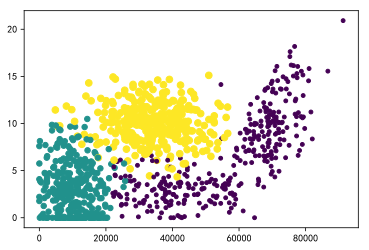

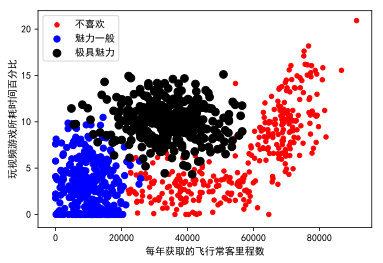

In [3]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
#s参数是大小，c参数是颜色,数组大小要和点数量大小一致
plt.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))

plt.figure()
axes = plt.subplot(111)

type1_x = []
type1_y = []
type2_x = []
type2_y = []
type3_x = []
type3_y = []

for i in range(len(datingLabels)):
    if datingLabels[i] == 1:
        type1_x.append(datingDataMat[i][0])
        type1_y.append(datingDataMat[i][1])

    if datingLabels[i] == 2:
        type2_x.append(datingDataMat[i][0])
        type2_y.append(datingDataMat[i][1])

    if datingLabels[i] == 3:
        type3_x.append(datingDataMat[i][0])
        type3_y.append(datingDataMat[i][1])

type1 = axes.scatter(type1_x, type1_y, s=20, c='r')
type2 = axes.scatter(type2_x, type2_y, s=40, c='b')
type3 = axes.scatter(type3_x, type3_y, s=60, c='k')

plt.legend((type1, type2, type3), ('不喜欢', '魅力一般', '极具魅力'))
plt.xlabel('每年获取的飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.show()

### 归一化数值

\[ \sqrt{\left ( 0-67 \right )^{2}+\left ( 20000-32000\right )^{2}+\left ( 1.1-0.1 \right )^{2}}\]

发现：数值差值最大的属性对计算结果影响较大，原因仅因为飞行常客里程数远大于其它特征值，但三者应同样重要，等权值。为处理这种不同取值范围的特征值，采用数值归一化。

\[ newValue = (oldValue-min)/(max-min)\]

min和max是数据集中最小和最大特征值。虽改变了数值取值范围但增加了分类器复杂度。

In [4]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)  # 取每列的最小值
    maxVals = dataSet.max(0)  # 取每列的最大值
    ranges = maxVals-minVals  # 一个行向量
    normDataSet = np.zeros(np.shape(dataSet))  # shape(dataSet)返回维数
    m = dataSet.shape[0]  # dataSer.shape返回维数，tuple
    # 注意:这不是矩阵除法，在numpy库矩阵除法要用linalg.solve(matA,matB)
    normDataSet = dataSet-np.tile(minVals, (m, 1))
    normDataSet /= np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

返回取值范围和最小值为了归一化测试数据

## 训练算法

此步骤不适合于K-近邻算法

## 测试算法

为测试分类器的效果,通常我们只提供已有数据的90%训练分类器,而使用其余的10%数据去测试。10%的测试数据应该是随机选择。使用错误率来检测分类器的性能

In [6]:
def datingClassTest():
    hoRatio=0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    for i in range(numTestVecs):
        classifierResult=KNN.classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('the classifier came back with: %d, the real answer id: %d'%(classifierResult,datingLabels[i]))
        if (classifierResult!=datingLabels[i]):errorCount+=1.0
    print('the total error rate is: %f'%(errorCount/numTestVecs))

将训练集和测试集导入原始KNN分类器classify0。注意此处我们使用原始分类器,本示例花费了大量的篇幅在讲解:1.如何处理数据2.如何改造数据为分类器可以使用的特征值3.得到可靠的数据,后续示例将介绍这个主题。

In [7]:
datingClassTest()

the classifier came back with: 3, the real answer id: 3
the classifier came back with: 2, the real answer id: 2
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 3, the real answer id: 3
the classifier came back with: 3, the real answer id: 3
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 3, the real answer id: 3
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 2, the real answer id: 2
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answer id: 1
the classifier came back with: 1, the real answe

错误率是5%，相当不错的结果。改变函数datingClassTest内变量hoRatio和变量k的值,检测错误率是否随着变量值的变化而增加。依赖于分类算法、数据集和程序设置,分类器的输出结果可能有很大的不同。

## 使用算法

构建完整可用系统

In [14]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input('perccentage of time spent playing video games?'))#input输入的是字符串
    ffMiles = float(input('frequent flier miles earned per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = KNN.classify0((inArr-minVals)/ranges, normMat, datingLabels, 3)
    print('You will probably like this person: ',resultList[classifierResult-1])
classifyPerson()

perccentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses
